# Clustering Test
1. DBSCAN
2. Mean Shift Clustering

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth 
from sklearn.neighbors import NearestNeighbors 
from sklearn.mixture import GaussianMixture 
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import seaborn as sns 
from scipy.spatial.distance import pdist, squareform
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('Processed_Data.csv')

In [3]:
cluster_features = ['vendor_count', 'is_chain', 
                                       'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
                                       'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 
                                       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 
                                       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 
                                       'CUI_Thai', 'engagement_duration', 'tot_value_cui', 
                                       'preferred_order_day', 'preferred_order_hour', 
                                       'age_category']

print('cluster_features', cluster_features)

cluster_features ['vendor_count', 'is_chain', 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'engagement_duration', 'tot_value_cui', 'preferred_order_day', 'preferred_order_hour', 'age_category']


### 4. DBSCAN (Density-based spatial clustering of applications with noise)

In [4]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

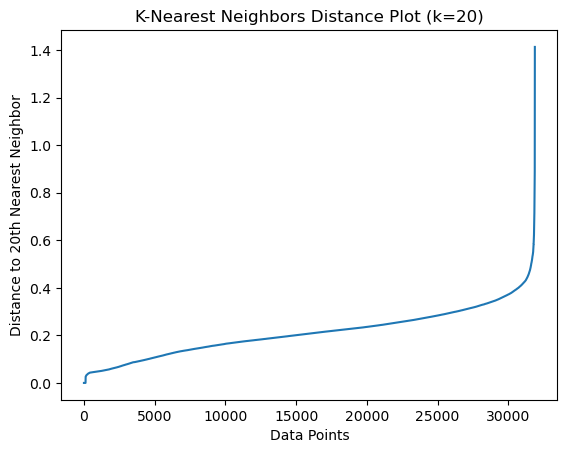

In [5]:
# Scale the data to [0, 1] range
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[cluster_features])

# Fit the NearestNeighbors model on the scaled data
neigh = NearestNeighbors(n_neighbors=20)
neigh.fit(scaled_data)

# Compute distances to the k-nearest neighbors
distances, _ = neigh.kneighbors(scaled_data)

# Sort distances (take the k-th distance for each point)
distances = np.sort(distances[:, -1])

# Plot the distances
plt.plot(distances)
plt.xlabel('Data Points')
plt.ylabel(f'Distance to {20}th Nearest Neighbor')
plt.title(f'K-Nearest Neighbors Distance Plot (k=20)')
plt.show()


In [6]:
# Set parameters based on the elbow plot
eps = 0.37
min_samples = 5  # Start with a common default value

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(df)  # Use the full dataframe

# Get basic statistics
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)  # Exclude noise (-1)
n_noise = list(clusters).count(-1)

print(f"Number of clusters found: {n_clusters}")
print(f"Number of noise points: {n_noise}")

# Count points per cluster, excluding noise points
if n_clusters > 0:
    points_per_cluster = np.bincount(clusters[clusters != -1])
    print(f"Points per cluster: {points_per_cluster}")
else:
    print("No clusters found (all points are noise).")

# Calculate silhouette score if more than one cluster exists and not all points are noise
if n_clusters > 1 and n_noise != len(clusters):
    mask = clusters != -1  # Exclude noise points
    sil_score = silhouette_score(df[mask], clusters[mask])
    print(f"Silhouette score: {sil_score:.3f}")
else:
    print("Silhouette score cannot be computed (single cluster or all points are noise).")

Number of clusters found: 5
Number of noise points: 31735
Points per cluster: [66 47 14  8  5]
Silhouette score: 0.999


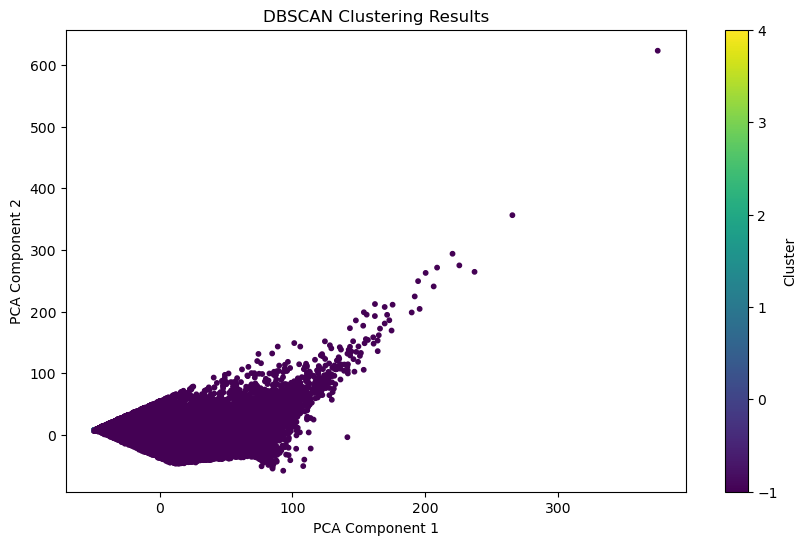

In [7]:
# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', s=10)
plt.title('DBSCAN Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


### 5. Mean Shift Clustering

In [8]:
bandwidth = estimate_bandwidth(df[cluster_features], quantile=0.3, random_state=1, n_jobs=-1)
bandwidth

50.63305123475709

In [9]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=4)
ms_labels = ms.fit_predict(df[cluster_features])

ms_n_clusters = len(np.unique(ms_labels))
print("Number of estimated clusters : %d" % ms_n_clusters)

Number of estimated clusters : 146


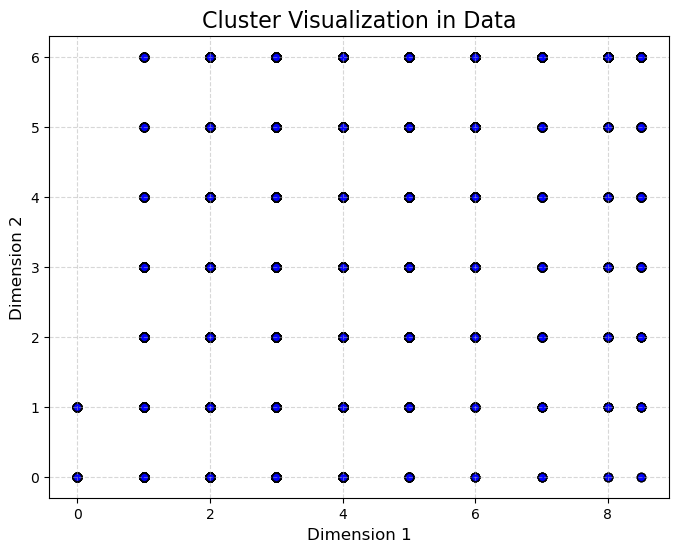

In [10]:
def plot_clusters(X):
    """
    Plots the provided data to facilitate cluster identification.

    Parameters:
    - X: array-like, shape (n_samples, 2)
        Data with 2 dimensions for visualization.
    """
    if X.shape[1] < 2:
        raise ValueError("Data must have at least 2 dimensions to plot.")
    
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c='blue', alpha=0.9, edgecolors='k')
    plt.title("Cluster Visualization in Data", fontsize=16)
    plt.xlabel("Dimension 1", fontsize=12)
    plt.ylabel("Dimension 2", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()



# Ensure the data is in NumPy format and select the first two columns
X = df.iloc[:, :2].values  # Select the first two columns

# Plot the clusters
plot_clusters(X)
